# Task
Perform K-means clustering on the joined data from the `/content/2014_an32.csv` and `/content/2014_an26.csv` files, including data loading, joining, preprocessing, clustering, and visualization of the results.

## Load and Join Data

### Subtask:
Load the two CSV files (`/content/2014_an32.csv` and `/content/2014_an26.csv`) into pandas DataFrames, inspect their columns, and join them based on suitable parameters.


**Reasoning**:
First, import the pandas library, then load the two CSV files into separate DataFrames, and display their first 5 rows to understand their structure and common columns for joining.



In [ ]:
import pandas as pd

df_an32 = pd.read_csv('/content/2014_an32.csv')
df_an26 = pd.read_csv('/content/2014_an26.csv')

print("First 5 rows of df_an32:")
print(df_an32.head())
print("\nFirst 5 rows of df_an26:")
print(df_an26.head())

First 5 rows of df_an32:
  S.No         States/UTs  Intake of Alcohal-Number of Accident - 2014  \
0    1     Andhra Pradesh                                          594   
1    2  Arunachal Pradesh                                           11   
2    3              Assam                                          613   
3    4              Bihar                                         1680   
4    5       Chhattisgarh                                          335   

   Intake of Alcohal-Persons  Killed  - 2014  \
0                                        193   
1                                          7   
2                                        244   
3                                        890   
4                                         93   

   Intake of Alcohal-Persons Injured - 2014  \
0                                       851   
1                                        22   
2                                       480   
3                                       972   
4     

**Reasoning**:
Based on the inspection of the first 5 rows, both dataframes `df_an32` and `df_an26` have 'S.No' and 'States/UTs' columns, which can be used as common keys to join them. An inner merge will ensure that only the matching rows from both dataframes are included in the `df_joined` DataFrame.



In [ ]:
df_joined = pd.merge(df_an32, df_an26, on=['S.No', 'States/UTs'], how='inner')

print("First 5 rows of the joined DataFrame:")
print(df_joined.head())
print("Shape of the joined DataFrame:", df_joined.shape)

First 5 rows of the joined DataFrame:
  S.No         States/UTs  Intake of Alcohal-Number of Accident - 2014  \
0    1     Andhra Pradesh                                          594   
1    2  Arunachal Pradesh                                           11   
2    3              Assam                                          613   
3    4              Bihar                                         1680   
4    5       Chhattisgarh                                          335   

   Intake of Alcohal-Persons  Killed  - 2014  \
0                                        193   
1                                          7   
2                                        244   
3                                        890   
4                                         93   

   Intake of Alcohal-Persons Injured - 2014  \
0                                       851   
1                                        22   
2                                       480   
3                                       

## Data Preprocessing

### Subtask:
Prepare the joined data for K-means clustering, which may include handling missing values, selecting relevant features, and scaling the data.


### Inspecting Data and Handling Missing Values

**Reasoning**:
Before proceeding with clustering, it's crucial to inspect the `df_joined` DataFrame to understand its structure, identify numerical columns that are relevant for clustering, and check for any missing values. Identifier columns like 'S.No' and 'States/UTs' should be excluded as they don't contribute to clustering based on accident patterns. After identifying the numerical columns, we'll check for missing values. Based on the previous output, the `df_joined` dataframe already shows that many columns are numerical, so we will primarily focus on columns that are not 'S.No' or 'States/UTs'. If missing values are present, an appropriate imputation strategy will be applied to ensure the data is clean for clustering.

**Reasoning**:
To prepare for clustering, I will first identify the numerical columns suitable for analysis by excluding identifier columns, then check for any missing values in these columns, and finally impute them with the median to maintain data integrity for the clustering process.



In [ ]:
import numpy as np

# Identify numerical columns for clustering, excluding identifier columns
# and ensuring all selected columns are numeric
df_features = df_joined.select_dtypes(include=np.number).drop(columns=['S.No'], errors='ignore')

print("Columns selected for clustering and their data types:")
print(df_features.info())

# Check for missing values in the selected feature DataFrame
missing_values = df_features.isnull().sum()
print("\nMissing values per column before imputation:")
print(missing_values[missing_values > 0])

# Impute missing values with the median of each column
for column in df_features.columns:
    if df_features[column].isnull().any():
        median_val = df_features[column].median()
        df_features[column].fillna(median_val, inplace=True)

print("\nMissing values per column after imputation:")
print(df_features.isnull().sum().sum())
print("First 5 rows of df_features after handling missing values:")
print(df_features.head())

Columns selected for clustering and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 93 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Intake of Alcohal-Number of Accident - 2014                        37 non-null     int64  
 1   Intake of Alcohal-Persons  Killed  - 2014                          37 non-null     int64  
 2   Intake of Alcohal-Persons Injured - 2014                           37 non-null     int64  
 3   Exceeding lawful speed-Number of Accident - 2014                   36 non-null     float64
 4   Exceeding lawful speed-Persons  Killed  - 2014                     36 non-null     float64
 5   Exceeding lawful speed-Persons Injured - 2014                      36 non-null     float64
 6   Did not give right of way to veh-Number of Accident - 2014         37 

/tmp/ipython-input-404984740.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features[column].fillna(median_val, inplace=True)


**Reasoning**:
The previous code block generated a `FutureWarning` because `inplace=True` used within a chained assignment (e.g., `df_features[column].fillna(median_val, inplace=True)`) will not work as intended in future pandas versions. To address this, I will modify the imputation step to directly assign the result of `fillna` back to the column, eliminating the need for `inplace=True` and resolving the warning.



In [ ]:
import numpy as np

# Identify numerical columns for clustering, excluding identifier columns
# and ensuring all selected columns are numeric
df_features = df_joined.select_dtypes(include=np.number).drop(columns=['S.No'], errors='ignore')

print("Columns selected for clustering and their data types:")
print(df_features.info())

# Check for missing values in the selected feature DataFrame
missing_values = df_features.isnull().sum()
print("\nMissing values per column before imputation:")
print(missing_values[missing_values > 0])

# Impute missing values with the median of each column
for column in df_features.columns:
    if df_features[column].isnull().any():
        median_val = df_features[column].median()
        df_features[column] = df_features[column].fillna(median_val)

print("\nMissing values per column after imputation:")
print(df_features.isnull().sum().sum())
print("First 5 rows of df_features after handling missing values:")
print(df_features.head())

Columns selected for clustering and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 93 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Intake of Alcohal-Number of Accident - 2014                        37 non-null     int64  
 1   Intake of Alcohal-Persons  Killed  - 2014                          37 non-null     int64  
 2   Intake of Alcohal-Persons Injured - 2014                           37 non-null     int64  
 3   Exceeding lawful speed-Number of Accident - 2014                   36 non-null     float64
 4   Exceeding lawful speed-Persons  Killed  - 2014                     36 non-null     float64
 5   Exceeding lawful speed-Persons Injured - 2014                      36 non-null     float64
 6   Did not give right of way to veh-Number of Accident - 2014         37 

**Reasoning**:
With missing values handled, the next step is to scale the numerical features. This is important for K-means clustering to ensure that features with larger values do not dominate the distance calculations. I will use `StandardScaler` to transform the `df_features` DataFrame.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(df_features)

# Convert the scaled features back to a DataFrame for easier inspection (optional but good practice)
scaled_df_features = pd.DataFrame(scaled_features, columns=df_features.columns)

print("First 5 rows of the scaled features DataFrame:")
print(scaled_df_features.head())
print("Shape of the scaled features DataFrame:", scaled_df_features.shape)

First 5 rows of the scaled features DataFrame:
   Intake of Alcohal-Number of Accident - 2014  \
0                                    -0.139383   
1                                    -0.329028   
2                                    -0.133202   
3                                     0.213883   
4                                    -0.223633   

   Intake of Alcohal-Persons  Killed  - 2014  \
0                                  -0.163074   
1                                  -0.328235   
2                                  -0.117788   
3                                   0.455839   
4                                  -0.251870   

   Intake of Alcohal-Persons Injured - 2014  \
0                                 -0.062718   
1                                 -0.323492   
2                                 -0.179421   
3                                 -0.024655   
4                                 -0.266556   

   Exceeding lawful speed-Number of Accident - 2014  \
0                        

## K-Means Clustering

### Subtask:
Implement K-means clustering on the preprocessed data, aligning with a useful application.


**Reasoning**:
To determine the optimal number of clusters for K-means, I will first import the necessary libraries, `KMeans` and `silhouette_score`. Then, I will apply the Elbow Method by iterating through a range of `k` values, fitting a `KMeans` model for each, and recording the inertia (WCSS).



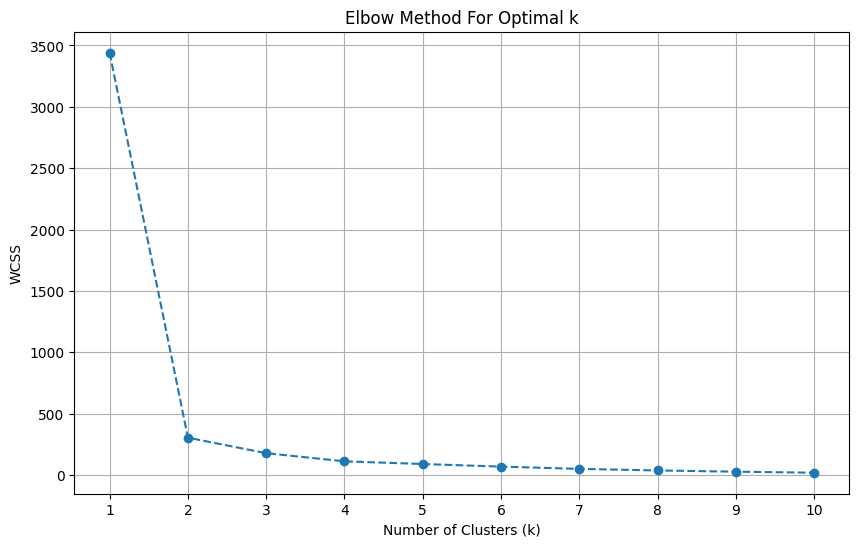

WCSS values for k from 1 to 10:
k=1: 3441.00
k=2: 304.37
k=3: 177.85
k=4: 111.72
k=5: 89.80
k=6: 68.49
k=7: 50.09
k=8: 37.27
k=9: 27.23
k=10: 18.81


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
# Iterate k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("WCSS values for k from 1 to 10:")
for i, val in enumerate(wcss):
    print(f"k={i+1}: {val:.2f}")

**Reasoning**:
Based on the Elbow Method plot and WCSS values, the 'elbow' point appears to be at k=3, indicating that 3 is a reasonable optimal number of clusters. I will now apply K-means clustering with 3 clusters to the scaled features and add the resulting cluster labels to the original joined DataFrame.



In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df_features)

df_joined['cluster_label'] = cluster_labels

print(f"K-means clustering applied with {optimal_k} clusters.")
print("Cluster labels added to df_joined DataFrame.")
print("First 5 rows of df_joined with new 'cluster_label' column:")
print(df_joined.head())

K-means clustering applied with 3 clusters.
Cluster labels added to df_joined DataFrame.
First 5 rows of df_joined with new 'cluster_label' column:
  S.No         States/UTs  Intake of Alcohal-Number of Accident - 2014  \
0    1     Andhra Pradesh                                          594   
1    2  Arunachal Pradesh                                           11   
2    3              Assam                                          613   
3    4              Bihar                                         1680   
4    5       Chhattisgarh                                          335   

   Intake of Alcohal-Persons  Killed  - 2014  \
0                                        193   
1                                          7   
2                                        244   
3                                        890   
4                                         93   

   Intake of Alcohal-Persons Injured - 2014  \
0                                       851   
1                       